In [88]:
import numpy as np
import pandas as pd
import scipy.stats

pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt, rcParams
# import cv2
import seaborn as sns

sns.set(style="white", context="paper")
from cycler import cycler
import os, sys
import glob
from datetime import datetime, timedelta
from itertools import combinations
import base64
from PIL import Image
from io import BytesIO as _BytesIO
import requests
import json
import pickle
from datetime import datetime
from IPython.display import display, Markdown, Latex
from sklearn.metrics import *
import collections
from copy import deepcopy
import traceback
from sympy import Point, Polygon
# import plotly
# from pandas_profiling import ProfileReport

pd.options.display.max_columns = None


def printm(s): return display(Markdown(s))

In [251]:
course = '21127L'
session = 'classinsight-cmu_21127L_ph_a22_201903191630'
session_id_file = f'../cache/analysis_tracking/session_tracking_info/{session}-front.pb'
session_frame_dir = f'/mnt/ci-nas-cache/edulyzeV2/track/{course}/{session}-front'
print(len(glob.glob(f"{session_frame_dir}/*")))

13735


In [252]:
df_tracking = pickle.load(open(session_id_file,'rb')).transpose()
df_tracking.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

27.0

In [241]:
col_start_stop_idxs = []
MIN_ID_FRAMES = 900
MAX_ID_DISTANCE = 900
MAX_BBOX_OVERLAP = 0.4
for col in df_tracking.columns:
    one_idxs = df_tracking.index[np.where(df_tracking[col]==1)[0]].values
    col_start_stop_idxs.append([col, one_idxs.min(), one_idxs.max()])
df_id_start_stop = pd.DataFrame(col_start_stop_idxs, columns=['id','min_idx','max_idx'])
df_id_start_stop['total_idxs'] = df_id_start_stop['max_idx']-df_id_start_stop['min_idx']
df_id_start_stop = df_id_start_stop[df_id_start_stop.total_idxs>MIN_ID_FRAMES].reset_index(drop=True)
df_id_start_stop

,id,min_idx,max_idx,total_idxs
0,1,0,41199,41199
1,2,0,41199,41199
2,4,0,41199,41199
3,5,0,16305,16305
4,6,0,10167,10167
...,...,...,...,...
57,1114,30771,31953,1182
58,1168,32208,33543,1335
59,1243,34164,41199,7035
60,1343,37437,41199,3762


In [242]:
total_idxs = df_id_start_stop.max_idx.max()
total_idxs

41199

In [243]:
potential_id_maps = {}
num_possible_maps = 0 
for row_idx, row in df_id_start_stop.iterrows():
    row_maxidx = row['max_idx']
    
    # get polygon for given id
    id_max_frame = row_maxidx
    id_frame_data = pickle.load(open(f"{session_frame_dir}/{id_max_frame}.pb","rb"))[1]
    id_frame_data = [xr for xr in id_frame_data if (xr['track_id']==row['id'])][0]
    id_bb = id_frame_data['bbox'][:4].astype(int)
    X_TL1, Y_TL1, X_BR1, Y_BR1 = id_bb
    # area_id_bb = (X_BR1-X_TL1)* (Y_BR1-Y_TL1)
    p1, p2, p3, p4  = map(Point, [[X_TL1,Y_TL1], [X_TL1,Y_BR1], [X_BR1,Y_BR1],[X_BR1, Y_TL1]]) 
    id_polygon = Polygon(p1, p2, p3, p4)

    potential_id_matches = df_id_start_stop[(df_id_start_stop.min_idx<=row_maxidx+MAX_ID_DISTANCE) & (df_id_start_stop.min_idx>row_maxidx-MAX_ID_DISTANCE)].id.values
    successful_matches = []
    if len(potential_id_matches)>0:
        num_possible_maps+=1
        print('\n',row['id'], potential_id_matches, row['min_idx'],row['max_idx'],row['total_idxs'])
        for matched_id in potential_id_matches:
            
            matched_id_min_frame = df_id_start_stop[df_id_start_stop.id==matched_id].min_idx.values[0]
            matched_id_frame_data = pickle.load(open(f"{session_frame_dir}/{matched_id_min_frame}.pb","rb"))[1]
            matched_id_frame_data = [xr for xr in matched_id_frame_data if (xr['track_id']==matched_id)][0]
            matched_id_bb = matched_id_frame_data['bbox'][:4].astype(int)
            X_TL2, Y_TL2, X_BR2, Y_BR2 = matched_id_bb
            # area_matched_id_bb = (X_BR2-X_TL2)* (Y_BR2-Y_TL2)
            
            p1, p2, p3, p4  = map(Point, [[X_TL2,Y_TL2], [X_TL2,Y_BR2], [X_BR2,Y_BR2],[X_BR2, Y_TL2]]) 
            matched_id_polygon = Polygon(p1, p2, p3, p4)
            
            #find intersection of two polygons
            # check if intersection exists
            if id_polygon.encloses_point(matched_id_polygon.centroid) & matched_id_polygon.encloses_point(id_polygon.centroid):
                X_TL_in, X_BR_in = sorted([X_TL1,X_TL2, X_BR1, X_BR2])[1:3]
                Y_TL_in, Y_BR_in = sorted([Y_TL1,Y_TL2, Y_BR1, Y_BR2])[1:3]
                # area_intersection = (X_BR_in-X_TL_in)* (Y_BR_in-Y_TL_in)
                # intersection = polygon_intersection(id_polygon,matched_id_polygon)
                # union_area = id_polygon.union(matched_id_polygon)
                p1, p2, p3, p4  = map(Point, [[X_TL_in,Y_TL_in], [X_TL_in,Y_BR_in], [X_BR_in,Y_BR_in],[X_BR_in, Y_TL_in]]) 
                intersection = Polygon(p1, p2, p3, p4)            

                #find polygon overlap
                area_intersection = np.abs(intersection.area)
                area_union = np.abs(id_polygon.area) + np.abs(matched_id_polygon.area) - area_intersection
                overlap_fraction  = (area_intersection/area_union).evalf()
            else:
                overlap_fraction=0.
            
            if overlap_fraction > MAX_BBOX_OVERLAP:
                successful_matches.append((matched_id, overlap_fraction))
            
            print('\tMatching Id: ', matched_id,':', 'frame:',matched_id_min_frame,'overlap_fraction:', overlap_fraction)
    if len(successful_matches) > 0:
        successful_matched_id = sorted(successful_matches, key=lambda x: x[1])[-1][0]
        print('\t Successful match id:',successful_matched_id)
        if row['id'] in potential_id_maps.keys():
            potential_id_maps[successful_matched_id] = potential_id_maps[row['id']]
        else:
            potential_id_maps[successful_matched_id] = row['id']
        
        
    
        #     print('\tMatching Ids: ', row['id'], matched_id,':', id_max_frame, matched_id_min_frame)
        #     print('\tPoly id: ', id_polygon, id_polygon.area, id_polygon.centroid.evalf())
        #     print('\tPoly matched id: ', matched_id_polygon, matched_id_polygon.area, matched_id_polygon.centroid.evalf())
        #     print('\tIntersection:', intersection, intersection.area, intersection.centroid.evalf())
        #     break
        # break
    # potential_id_maps[row['id']] = potential_id_matches

print(num_possible_maps)


 5 [502 534 541 563 577 579 580] 0 16305 16305
	Matching Id:  502 : frame: 16209 overlap_fraction: 0.0
	Matching Id:  534 : frame: 16476 overlap_fraction: 0.0
	Matching Id:  541 : frame: 16548 overlap_fraction: 0.0
	Matching Id:  563 : frame: 16821 overlap_fraction: 0.0
	Matching Id:  577 : frame: 17097 overlap_fraction: 0.0
	Matching Id:  579 : frame: 17133 overlap_fraction: 0.0
	Matching Id:  580 : frame: 17133 overlap_fraction: 0.0

 6 [278 297] 0 10167 10167
	Matching Id:  278 : frame: 9606 overlap_fraction: 0.0
	Matching Id:  297 : frame: 10161 overlap_fraction: 0.595250966432411
	 Successful match id: 297

 12 [502 534 541 563 577 579 580 608] 0 17061 17061
	Matching Id:  502 : frame: 16209 overlap_fraction: 0.0
	Matching Id:  534 : frame: 16476 overlap_fraction: 0.0
	Matching Id:  541 : frame: 16548 overlap_fraction: 0.0
	Matching Id:  563 : frame: 16821 overlap_fraction: 0.0
	Matching Id:  577 : frame: 17097 overlap_fraction: 0.0
	Matching Id:  579 : frame: 17133 overlap_fract

In [244]:
# potential_id_maps

In [245]:
df_tracking_new = df_tracking.copy(deep=True)


In [246]:

for matched_id in potential_id_maps:
    to_match_id = potential_id_maps[matched_id]
    df_tracking_new[to_match_id] =  df_tracking_new[to_match_id].where(~df_tracking_new[to_match_id].isnull(), df_tracking_new[to_match_id])
    df_tracking_new = df_tracking_new.drop(matched_id, axis=1)
    

In [247]:
df_tracking_new.shape

(13734, 1559)

In [248]:
col_start_stop_idxs = []
for col in df_tracking_new.columns:
    one_idxs = df_tracking_new.index[np.where(df_tracking_new[col]==1)[0]].values
    col_start_stop_idxs.append([col, one_idxs.min(), one_idxs.max()])
df_id_start_stop = pd.DataFrame(col_start_stop_idxs, columns=['id','min_idx','max_idx'])
df_id_start_stop['total_idxs'] = df_id_start_stop['max_idx']-df_id_start_stop['min_idx']
df_id_start_stop = df_id_start_stop[df_id_start_stop.total_idxs>MIN_ID_FRAMES].reset_index(drop=True)
df_id_start_stop.shape

(41, 4)

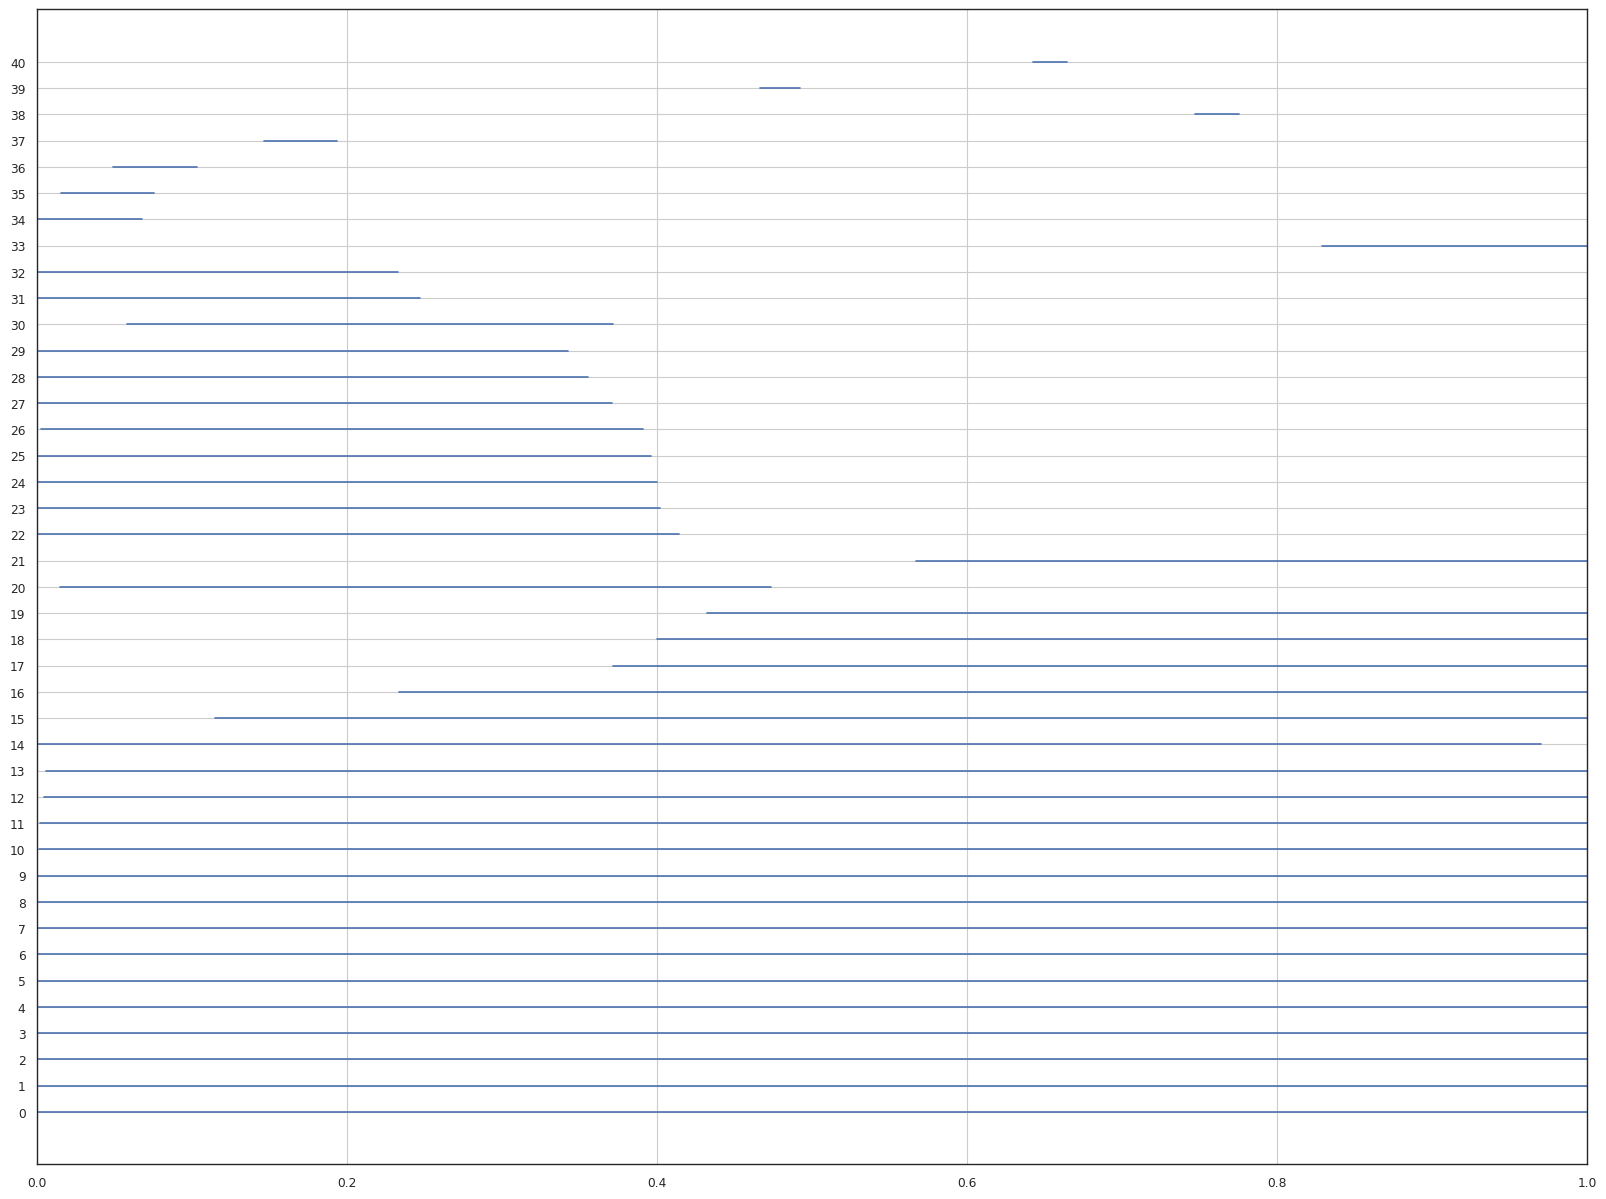

In [249]:
_ = plt.figure(figsize=(20,15))
for row_idx, row in df_id_start_stop.sort_values(by='total_idxs',ascending=False).reset_index(drop=True).iterrows():
    plt.axhline(y=row_idx, xmin=row['min_idx']/total_idxs,xmax=row['max_idx']/total_idxs)
plt.yticks(range(df_id_start_stop.shape[0]), range(df_id_start_stop.shape[0]))
plt.grid()

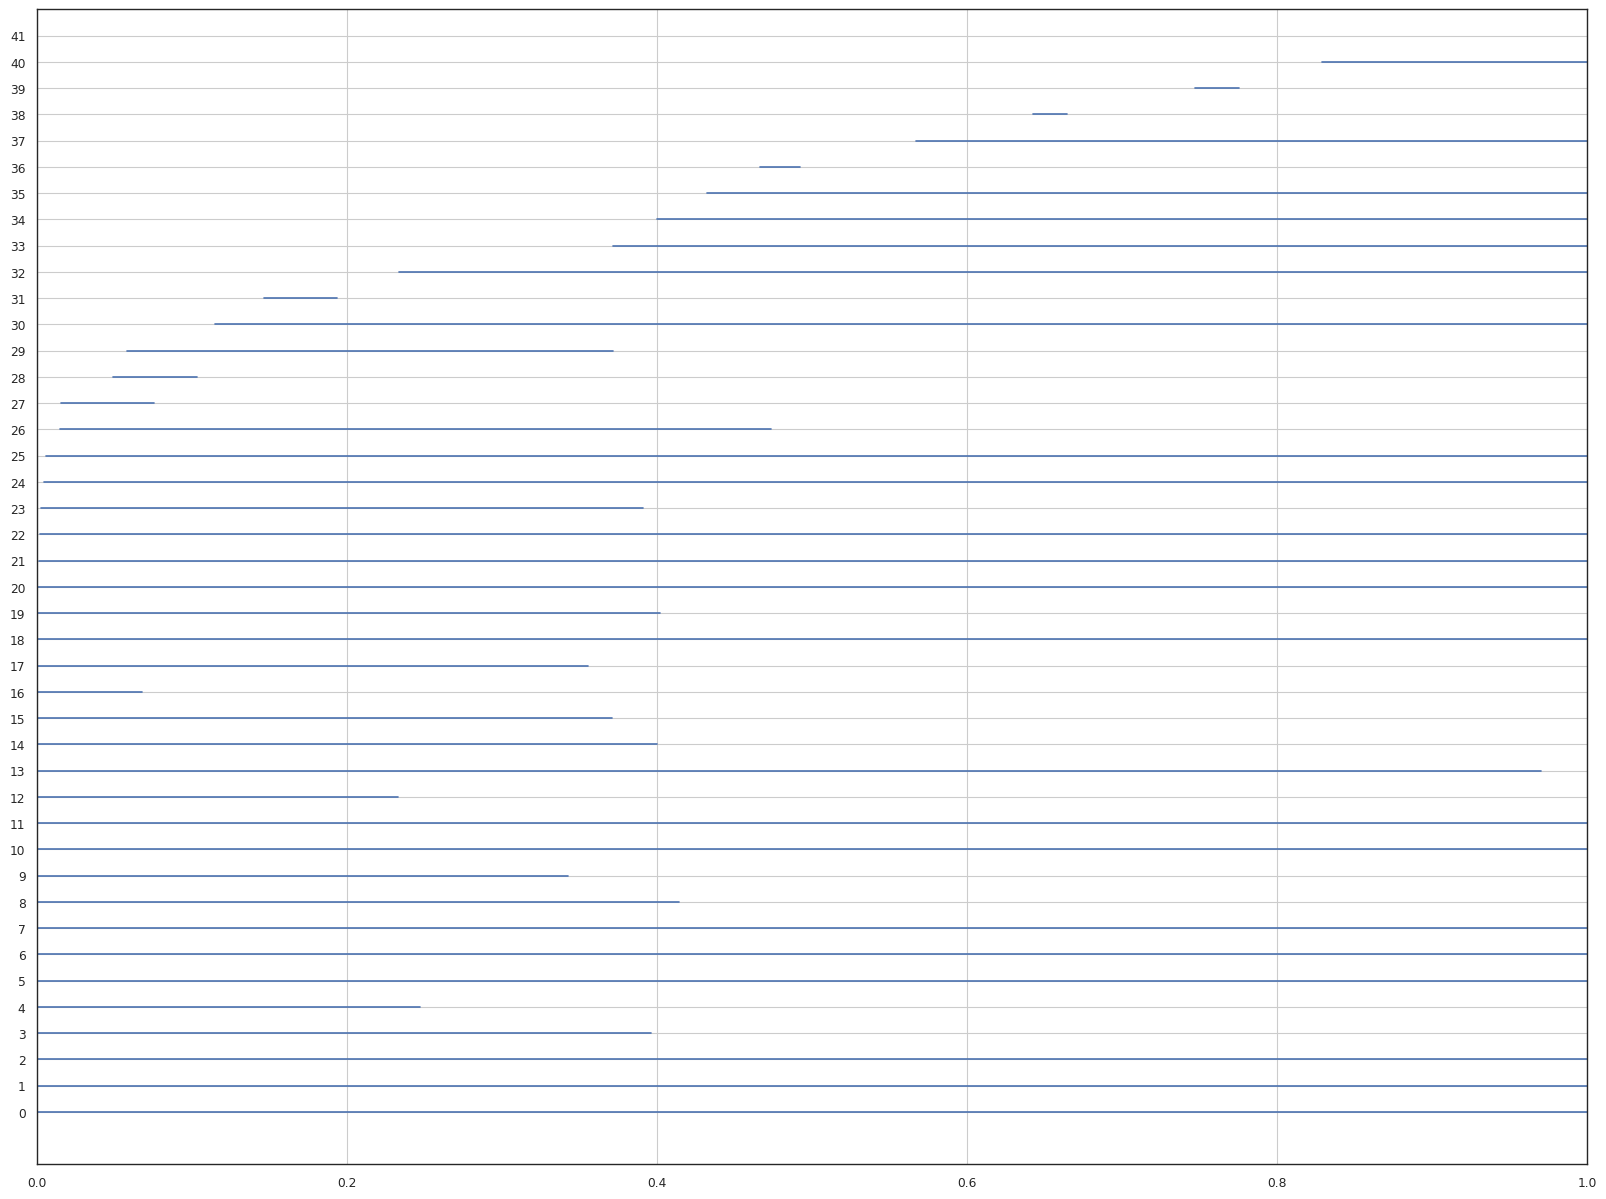

In [250]:
_ = plt.figure(figsize=(20,15))
# for row_idx, row in df_id_start_stop.sort_values(by='max_idx',ascending=False).reset_index(drop=True).iterrows():
for row_idx, row in df_id_start_stop.iterrows():
    plt.axhline(y=row_idx, xmin=row['min_idx']/total_idxs,xmax=row['max_idx']/total_idxs)
plt.yticks(range(42), range(42))
plt.grid()

In [226]:
df_id_start_stop

,id,min_idx,max_idx,total_idxs
0,1,0,41199,41199
1,2,0,41199,41199
2,4,0,41199,41199
3,5,0,16305,16305
4,6,0,10167,10167
5,8,0,41199,41199
6,9,0,41199,41199
7,10,0,41199,41199
8,12,0,17061,17061
9,13,0,14112,14112
